In [95]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [96]:
X = pd.read_csv('independent_variable.csv')
X.head()

,Sulfur_content_of_raw_material,RON_of_raw_material,Saturated_hydrocarbon,olefin,Bromine,density,Substitute_coke,Substitute_S,Regenerated_coke,Regenerated_S,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,188.0,90.6,53.23,24.40,61.49,726.09,2.32,7.30,1.84,5.98,...,2.0454,6368.7470,233.3108,83086802.0,832503.795,2216.4094,39063124.5,1840.1447,39608757.0,0.3533
1,169.0,90.5,52.30,26.40,61.88,731.30,2.37,7.34,0.55,4.38,...,2.0260,6360.6453,242.3692,82318954.0,803462.665,2370.5874,38810581.5,1641.7326,39389299.0,0.3545
2,177.0,90.7,52.30,26.31,61.72,729.61,2.43,7.27,1.89,5.82,...,1.9647,6504.9649,233.0769,82012004.0,791925.055,2326.4654,38693812.0,1600.6758,39312616.5,0.3502
3,159.0,90.4,52.30,26.10,61.33,725.40,3.08,7.35,0.98,4.67,...,2.0390,6506.8250,238.3499,81231373.5,762863.810,2495.2236,38410862.5,1563.7122,39120204.5,0.3539
4,173.0,89.6,52.24,26.67,61.33,725.43,2.45,6.58,0.83,4.52,...,1.9869,6560.2423,236.5762,80915707.5,751362.300,2807.7891,38283000.0,1554.3574,39045953.5,0.3581


In [97]:
y = pd.read_csv('dependent_variable.csv')
y.head()

,产品辛烷值
0,89.22
1,89.32
2,89.32
3,89.02
4,88.32


In [11]:
import seaborn as sns

In [110]:
x_data = X[["RON_of_raw_material"  ,  "S-ZORB.TE_5102.PV" ,  "S-ZORB.FT_9302.PV"  ,"S-ZORB.SIS_TE_2802", \
            "S-ZORB.TE_5006.DACA" , "S-ZORB.FT_2803.DACA" ,"S-ZORB.PT_1604.DACA", "S-ZORB.TE_1102.DACA.PV",\
           'S-ZORB.SIS_TE_2802','S-ZORB.FT_9302.PV','S-ZORB.TE_5006.DACA','S-ZORB.TE_5102.PV','S-ZORB.TE_1102.DACA.PV']]
x_data.head()

,RON_of_raw_material,S-ZORB.TE_5102.PV,S-ZORB.FT_9302.PV,S-ZORB.SIS_TE_2802,S-ZORB.TE_5006.DACA,S-ZORB.FT_2803.DACA,S-ZORB.PT_1604.DACA,S-ZORB.TE_1102.DACA.PV,S-ZORB.SIS_TE_2802,S-ZORB.FT_9302.PV,S-ZORB.TE_5006.DACA,S-ZORB.TE_5102.PV,S-ZORB.TE_1102.DACA.PV
0,90.6,31.3408,5361.6265,273.2372,139.5331,0.0,0.1813,425.9295,273.2372,5361.6265,139.5331,31.3408,425.9295
1,90.5,31.1838,5394.2922,282.0436,138.8561,0.0,0.1892,421.5344,282.0436,5394.2922,138.8561,31.1838,421.5344
2,90.7,30.2639,5349.3918,274.1667,139.1138,0.0,0.2000,425.2584,274.1667,5349.3918,139.1138,30.2639,425.2584
3,90.4,31.3218,5342.5033,270.0702,139.2140,0.0,0.1883,424.4062,270.0702,5342.5033,139.2140,31.3218,424.4062
4,89.6,31.5105,5208.6394,268.0220,139.2114,0.0,0.2108,428.5147,268.0220,5208.6394,139.2114,31.5105,428.5147


In [99]:
data = pd.read_csv('data_final.csv')
data.head()

,id,time,原料硫含量,原料辛烷值,饱和烃,烯烃,溴值,密度,产品硫含量,产品辛烷值,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,1,2020/5/26 8:00:00,188.0,90.6,53.23,24.40,61.49,726.09,3.2,89.22,...,2.0454,6368.7470,233.3108,83086802.0,832503.795,2216.4094,39063124.5,1840.1447,39608757.0,0.3533
1,2,2020/5/21 8:00:00,169.0,90.5,52.30,26.40,61.88,731.30,3.2,89.32,...,2.0260,6360.6453,242.3692,82318954.0,803462.665,2370.5874,38810581.5,1641.7326,39389299.0,0.3545
2,3,2020/5/19 8:00:00,177.0,90.7,52.30,26.31,61.72,729.61,3.2,89.32,...,1.9647,6504.9649,233.0769,82012004.0,791925.055,2326.4654,38693812.0,1600.6758,39312616.5,0.3502
3,4,2020/5/14 8:00:00,159.0,90.4,52.30,26.10,61.33,725.40,3.2,89.02,...,2.0390,6506.8250,238.3499,81231373.5,762863.810,2495.2236,38410862.5,1563.7122,39120204.5,0.3539
4,5,2020/5/12 8:00:00,173.0,89.6,52.24,26.67,61.33,725.43,3.2,88.32,...,1.9869,6560.2423,236.5762,80915707.5,751362.300,2807.7891,38283000.0,1554.3574,39045953.5,0.3581


In [100]:
y_Sulfur = data.产品硫含量.values

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(x_data, y_Sulfur, test_size=0.2, random_state=42)

In [ ]:
from bayes_opt import BayesianOptimization

def LGB_CV(max_depth,
          num_leaves,
          min_data_in_leaf,
          feature_fraction,
          bagging_fraction,
          lambda_l1):
    folds = KFold(n_splits=5,shuffle=True,random_state=15)
    oof = np.zeros(X_train.shape[0])
    
    for fold_,(trn_idx,val_idx) in enumerate(folds.split(X_train,y_train)):
        print('fold {}'.format(fold_))
        trn_data = lgb.Dataset(X_train[trn_idx],
                               label=y_train[trn_idx],
                               )
        val_data = lgb.Dataset(X_train[val_idx],
                               label=y_train[val_idx],
                               )
        params = {
            'num_leaves': int(num_leaves),
            'min_data_in_leaf': int(min_data_in_leaf), 
            'objective':'binary',
            'max_depth': int(max_depth),
            'learning_rate': 0.01,
            "boosting": "gbdt",
            "feature_fraction": feature_fraction,
            "bagging_freq": 1,
            "bagging_fraction": bagging_fraction ,
            "bagging_seed": 11,
            "metric": 'binary_error',
            "lambda_l1": lambda_l1,
            "verbosity": -1
        }
        clf = lgb.train(params,trn_data,5000,valid_sets=[trn_data,val_data], verbose_eval=500,
                        early_stopping_rounds = 200)
        predict = clf.predict(X_train[val_idx],
                                   num_iteration=clf.best_iteration)
        predict[predict>0.5] = 1
        predict[predict <= 0.5] = 0
        oof[val_idx] = predict
        
        del clf, trn_idx, val_idx
        
    return metrics.accuracy_score(oof, y_train)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(x_data, y, test_size=0.2, random_state=42)

In [112]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [113]:
 from sklearn.metrics import mean_squared_error
y_pred = regr.predict(X_train)
mean_squared_error(y_train, y_pred)

2.7845454742470834

In [114]:
y_pred = regr.predict(X_valid)
mean_squared_error(y_valid, y_pred)

1.8462841389386129

In [115]:
param = {'boosting_type':'gbdt',
         'objective' : 'regression', #任务类型
         'metric' : 'mse', #评估指标
         'learning_rate' : 0.01, #学习率
         'max_depth' : 20, #树的最大深度
         'feature_fraction':0.8, #设置在每次迭代中使用特征的比例
         'bagging_fraction': 0.8, #样本采样比例
         'bagging_freq': 8, #bagging的次数
         'lambda_l1': 0.3, #L1正则
          'lambda_l2': 0, #L2正则
        }
trn_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_valid, label=y_valid)
model = lgb.train(param,trn_data,valid_sets=[trn_data,val_data],\
                  num_boost_round = 100000,early_stopping_rounds=1000,verbose_eval=25)

Training until validation scores don't improve for 1000 rounds
[25]	training's l2: 2.34472	valid_1's l2: 1.55337
[50]	training's l2: 2.15111	valid_1's l2: 1.51759
[75]	training's l2: 2.01836	valid_1's l2: 1.50384
[100]	training's l2: 1.90829	valid_1's l2: 1.48482
[125]	training's l2: 1.80682	valid_1's l2: 1.4678
[150]	training's l2: 1.72958	valid_1's l2: 1.45933
[175]	training's l2: 1.65548	valid_1's l2: 1.47946
[200]	training's l2: 1.59242	valid_1's l2: 1.50019
[225]	training's l2: 1.52692	valid_1's l2: 1.51141
[250]	training's l2: 1.46345	valid_1's l2: 1.54288
[275]	training's l2: 1.40506	valid_1's l2: 1.56387
[300]	training's l2: 1.35519	valid_1's l2: 1.59682
[325]	training's l2: 1.31057	valid_1's l2: 1.62726
[350]	training's l2: 1.26545	valid_1's l2: 1.64801
[375]	training's l2: 1.22694	valid_1's l2: 1.66694
[400]	training's l2: 1.1872	valid_1's l2: 1.67475
[425]	training's l2: 1.15028	valid_1's l2: 1.70578
[450]	training's l2: 1.12376	valid_1's l2: 1.71173
[475]	training's l2: 1.0

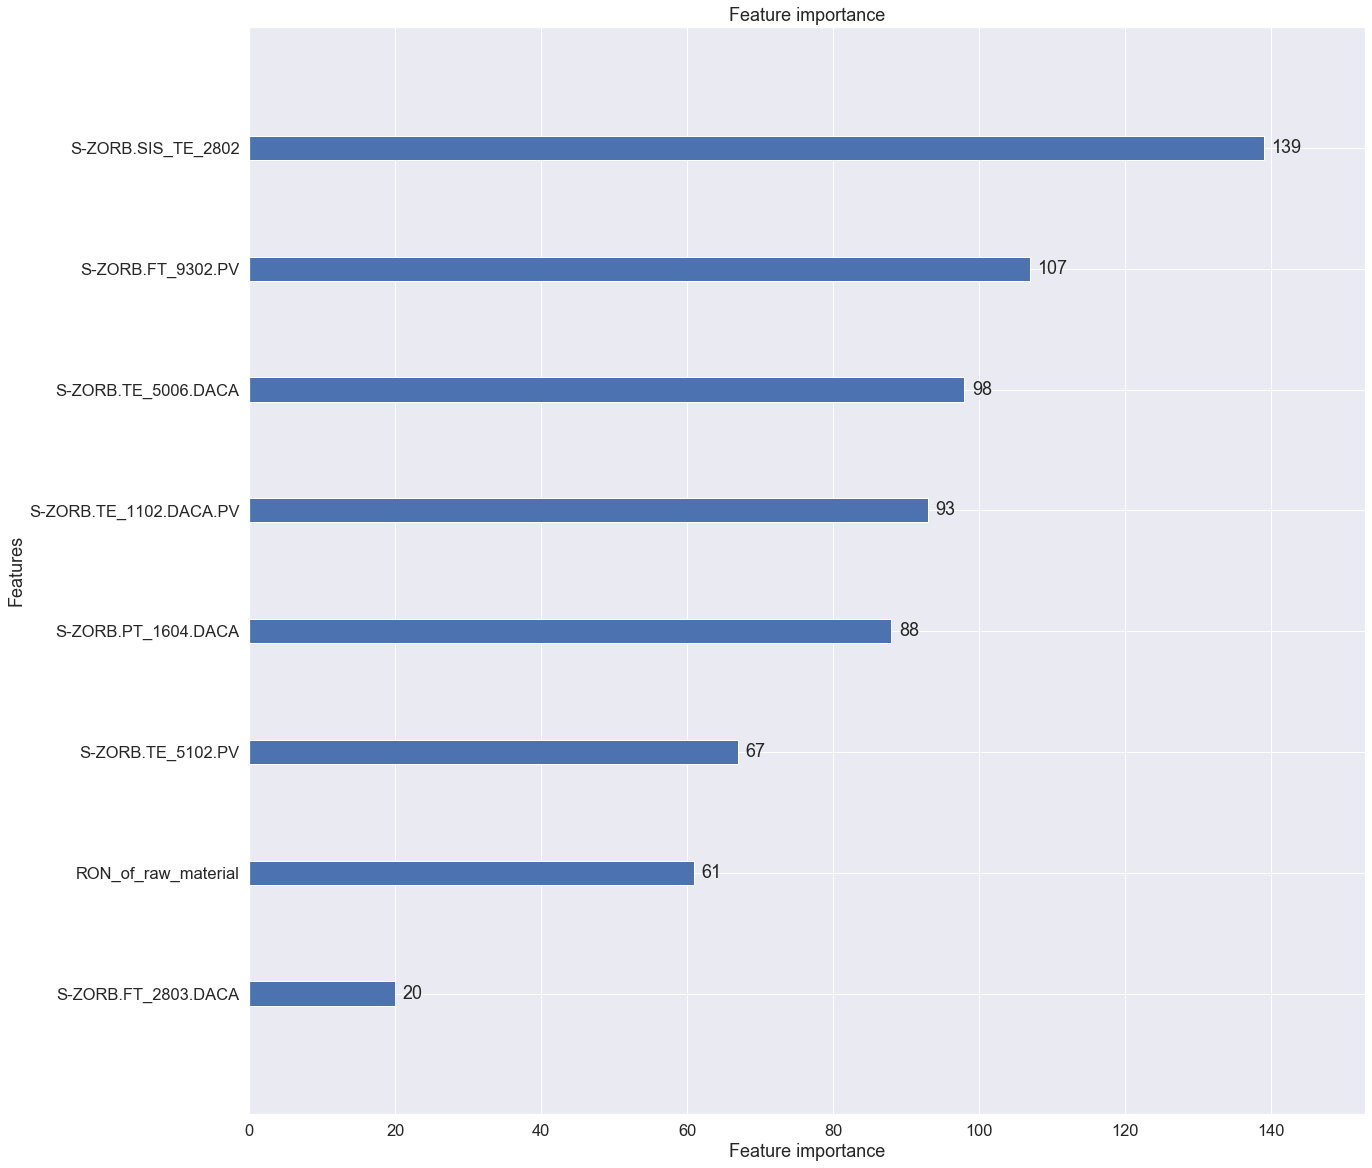

In [53]:
ax = lgb.plot_importance(model, max_num_features=30,figsize=(20,20))
plt.show()

In [103]:
['S-ZORB.SIS_TE_2802','S-ZORB.FT_9302.PV','S-ZORB.TE_5006.DACA','S-ZORB.TE_5102.PV','S-ZORB.PT_1064.DACA','S-ZORB.TE_1102.DACA.PV',\
'PON_of_raw_material'] 

True

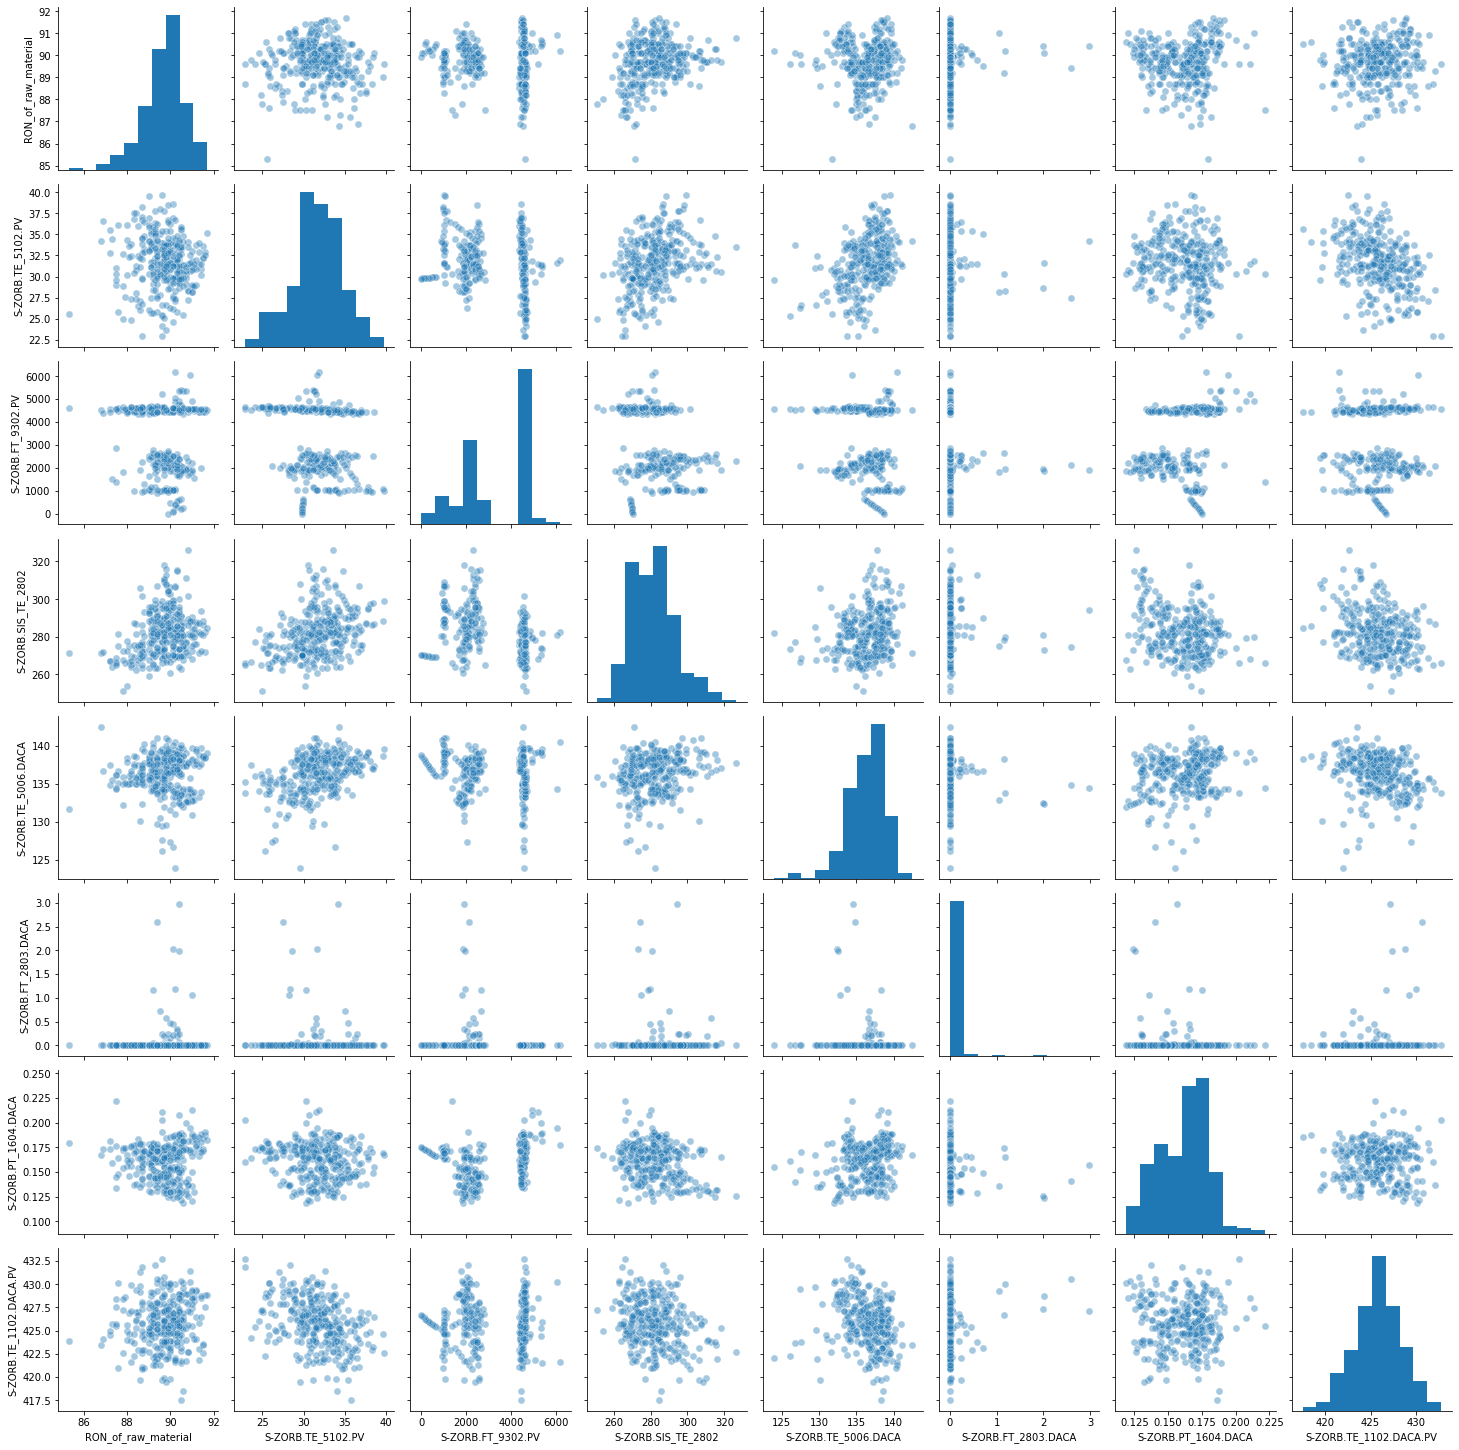

In [21]:
pairplot_fig = sns.pairplot(x_data)
pairplot_fig.savefig('./pairplot.png', dpi = 400)

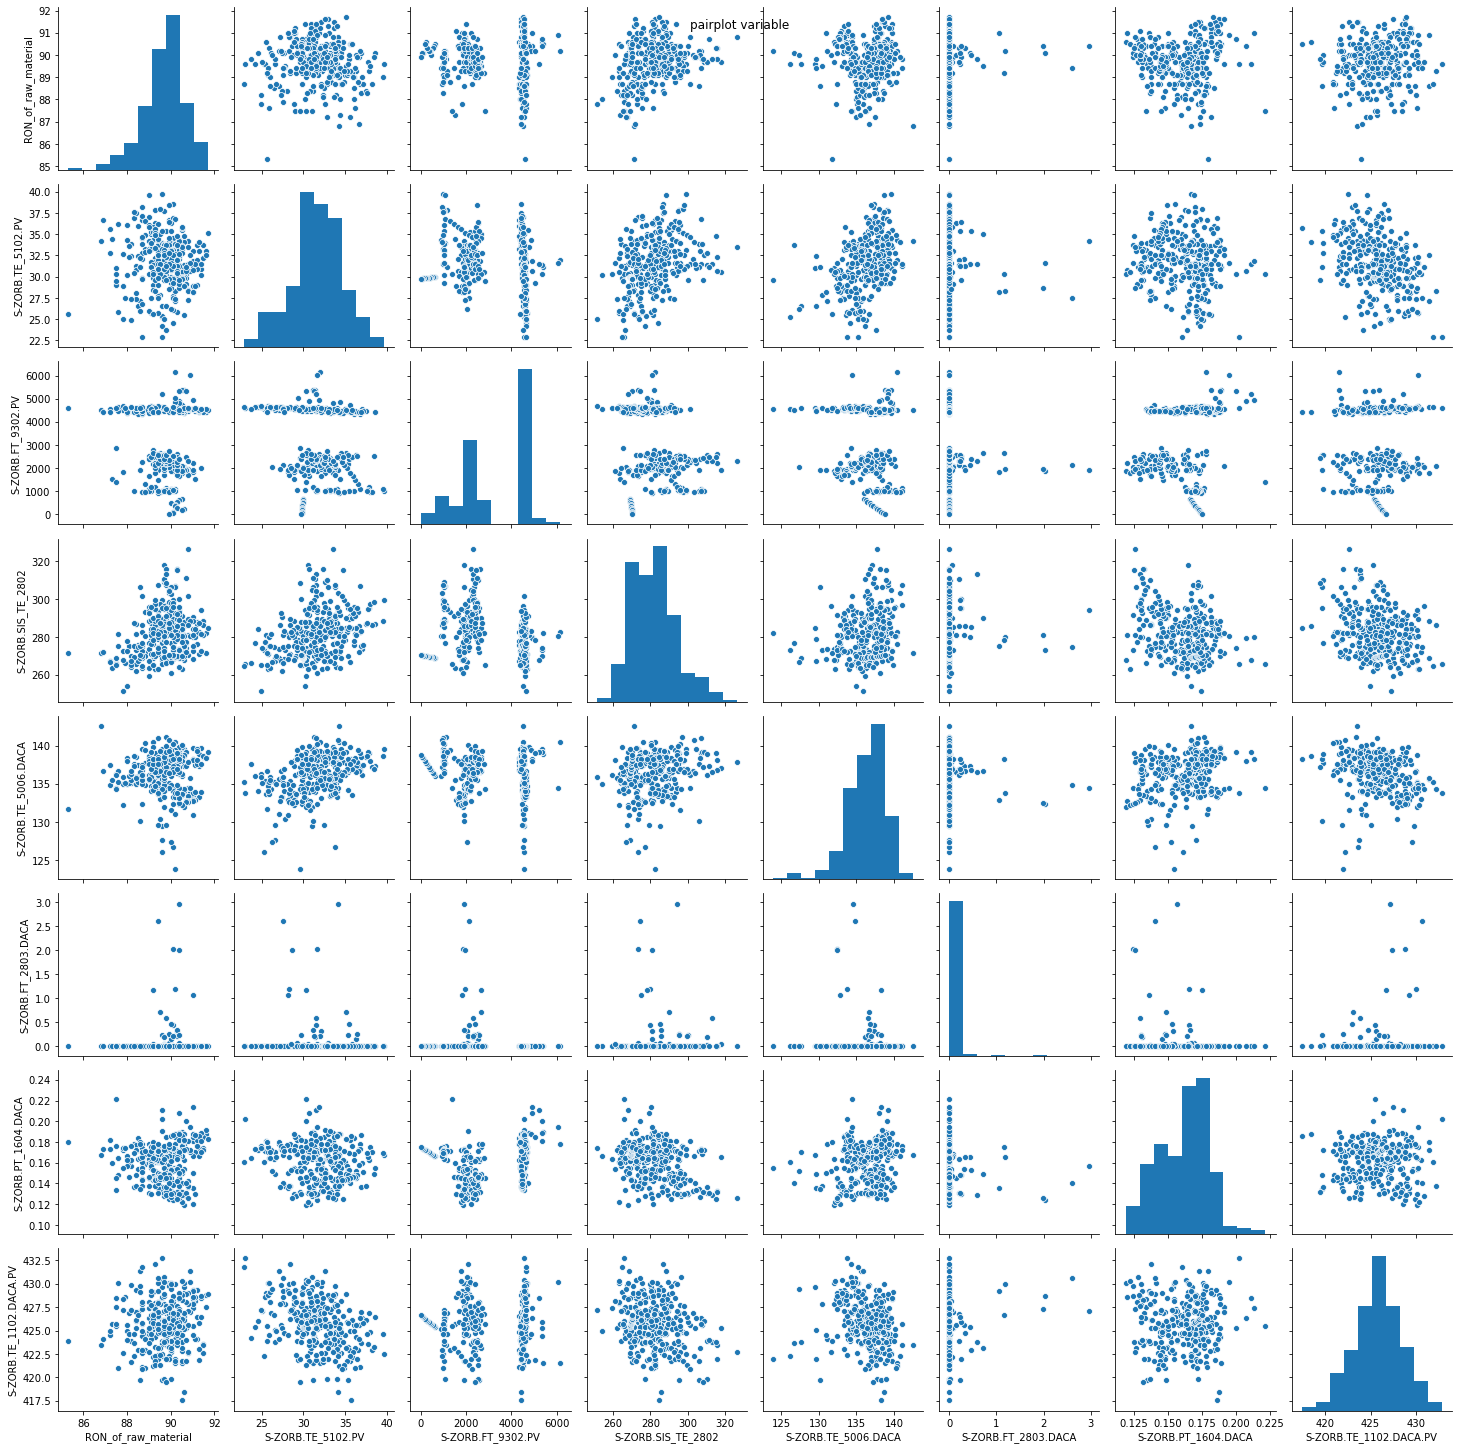

In [33]:
pairplot_fig = sns.pairplot(x_data)
plt.show()

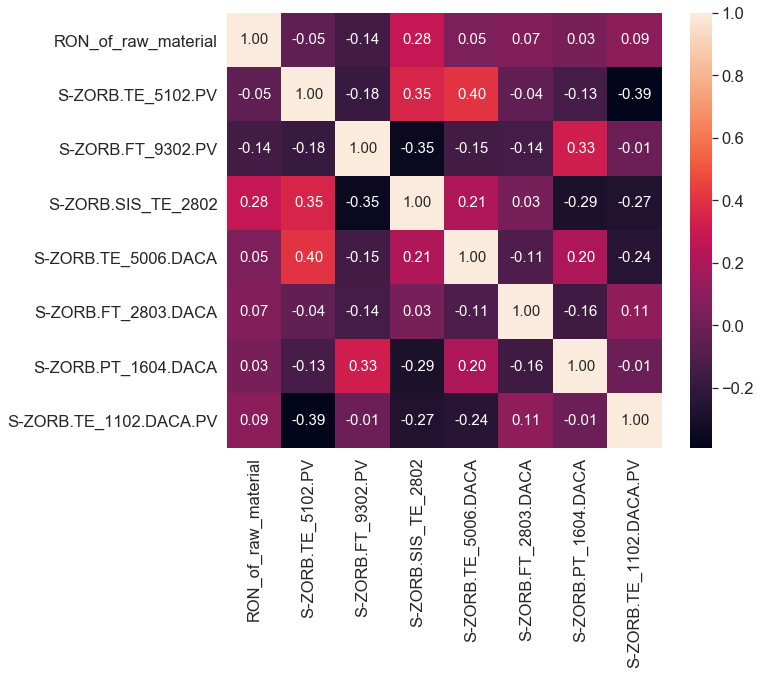

In [37]:
cols = ["RON_of_raw_material"  ,  "S-ZORB.TE_5102.PV" ,  "S-ZORB.FT_9302.PV"  ,"S-ZORB.SIS_TE_2802", \
            "S-ZORB.TE_5006.DACA" , "S-ZORB.FT_2803.DACA" ,"S-ZORB.PT_1604.DACA", "S-ZORB.TE_1102.DACA.PV"]
cm = np.corrcoef(x_data.values.T)

f, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.5)
ax = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()


In [63]:
x_data

,RON_of_raw_material,S-ZORB.TE_5102.PV,S-ZORB.FT_9302.PV,S-ZORB.SIS_TE_2802,S-ZORB.TE_5006.DACA,S-ZORB.FT_2803.DACA,S-ZORB.PT_1604.DACA,S-ZORB.TE_1102.DACA.PV
0,90.6,31.3408,5361.6265,273.2372,139.5331,0.0000,0.1813,425.9295
1,90.5,31.1838,5394.2922,282.0436,138.8561,0.0000,0.1892,421.5344
2,90.7,30.2639,5349.3918,274.1667,139.1138,0.0000,0.2000,425.2584
3,90.4,31.3218,5342.5033,270.0702,139.2140,0.0000,0.1883,424.4062
4,89.6,31.5105,5208.6394,268.0220,139.2114,0.0000,0.2108,428.5147
...,...,...,...,...,...,...,...,...
320,89.2,30.5459,2794.1411,281.8292,137.5554,0.0000,0.1645,426.7655
321,89.2,30.2672,2646.1265,278.3648,138.2620,1.1573,0.1747,426.6919
322,89.4,30.8613,2588.9566,281.3582,138.2342,0.0000,0.1783,428.0948
323,89.4,29.8136,2555.5613,274.2486,137.6488,0.0000,0.1713,427.9933


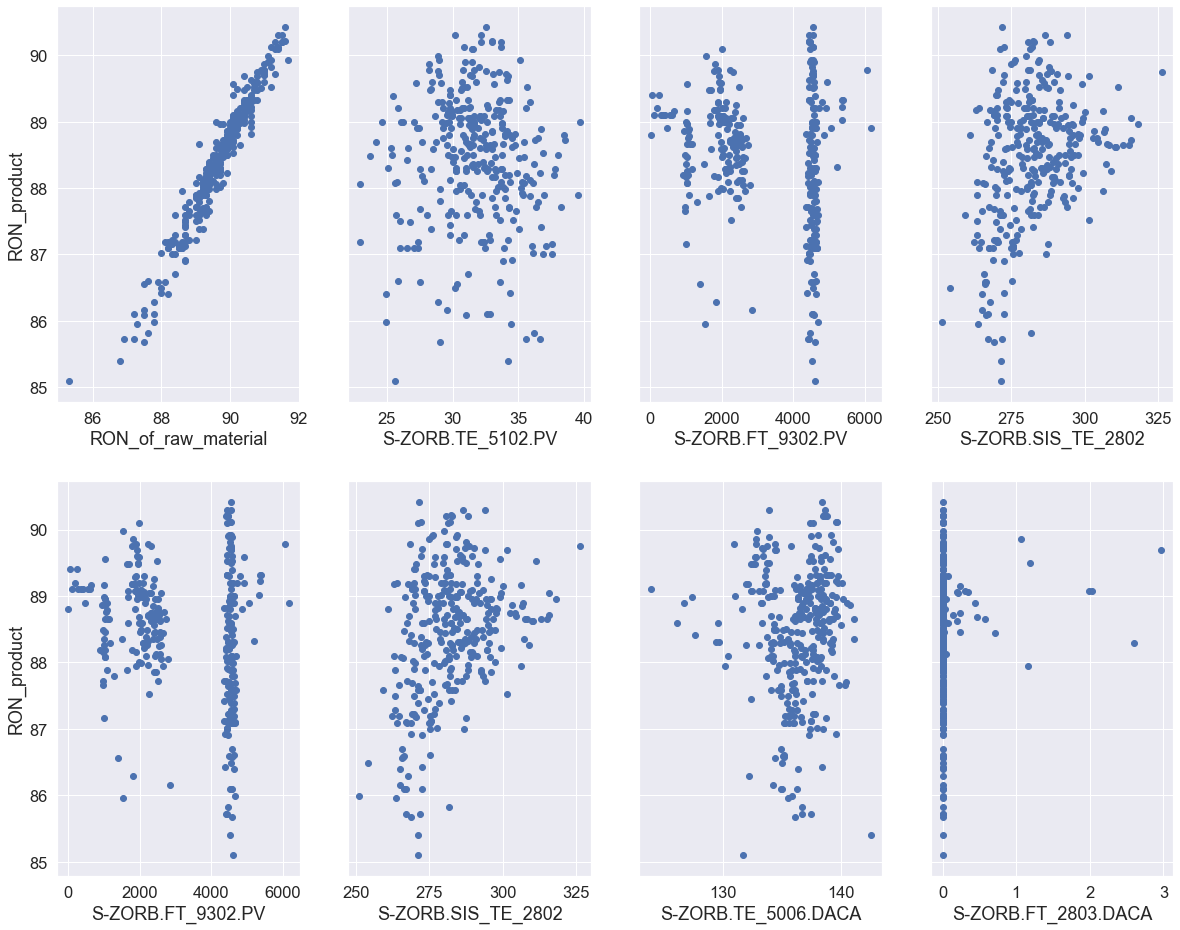

In [73]:
f, axes = plt.subplots(nrows=2,ncols=4,figsize=(20,16),sharey=True)
for i in range(2):
    for j in range(4):
        axes[i,j].scatter(x_data.iloc[:,2*i+j],y)
        axes[i,j].set_xlabel(x_data.columns[2*i+j])
    axes[i,0].set_ylabel('RON_product')

In [75]:
from keras import models
from keras import layers

In [117]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(13,)))
    model.add(layers.Dense(128,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam',loss='mse',metrics=['mse'])
    return model

In [118]:
y_train

array([ 3.2,  4.1,  3.2,  3.2,  3.2,  3.7,  3.2,  3.2,  7. ,  3.2,  6.5,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  5.4,  3.3,
        7.8,  3.2,  4.8,  4.6,  4.5,  3.2,  3.2,  9. ,  3.5,  3.2,  3.2,
        3.2,  3.6,  3.2,  3.2,  3.2,  4.1,  3.8,  3.2,  5.3,  3.2,  4.3,
        3.2,  3.2,  3.2,  3.2,  7.4,  3.2,  3.2,  3.2,  3.2,  3.2,  4.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  4. ,  3.2,  4.9,  5.1,  3.2,  3.2,  7.7,  5.6,  6.2,
        4.8,  3.2,  3.2,  3.2,  3.2,  3.9,  9.8,  3.2,  3.2,  3.4,  3.2,
        4.9,  3.3,  5.3,  3.2,  8.4,  5.5,  6.3,  3.4,  4. ,  3.2,  3.2,
        3.2,  3.2,  3.2,  7.3,  3.2,  4.7,  4.1,  3.2,  3.2,  3.2,  3.2,
        5.4,  4.5,  7.5,  5.1,  3.2,  3.2,  3.3,  3.5,  3.2,  5.6,  5.1,
        3.2,  3.9,  6.3,  3.2,  3.2,  3.2,  3.2,  4.1,  3.2,  3.2,  3.2,
        3.8,  8.5,  4.3,  3.2,  7.4,  3.2,  4.9,  3.2,  3.2,  3.3,  3.2,
        3.2,  3.2,  6.1,  3.2, 10.4,  3.9,  4.8,  4

In [119]:
num_epochs = 100

model = build_model()
history = model.fit(X_train.values,y_train,validation_data=(X_valid,y_valid),epochs=num_epochs,batch_size=1,verbose=0)

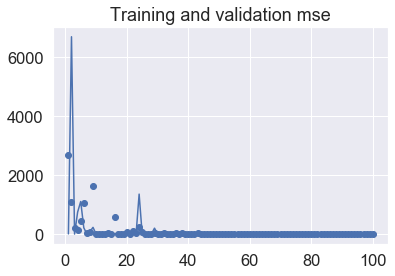

In [120]:
mse = history.history['mse']
val_mse = history.history['val_mse']
epochs = range(1,len(mse)+1)
plt.plot(epochs,mse,'bo',label='Training mse')
plt.plot(epochs,val_mse,'b',label='validation mse')
plt.title('Training and validation mse')
plt.show()

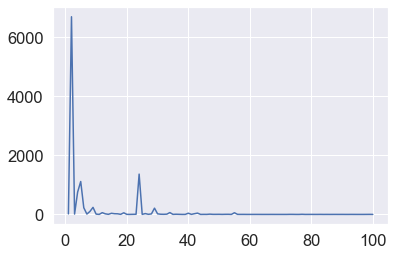

In [121]:
plt.plot(epochs,val_mse,'b',label='validation mse')

In [124]:
np.argmin(val_mse)

83

(array([229.,  37.,  19.,  13.,   9.,   6.,   7.,   2.,   2.,   1.]),
 array([ 3.2 ,  4.06,  4.92,  5.78,  6.64,  7.5 ,  8.36,  9.22, 10.08,
        10.94, 11.8 ]),
 <a list of 10 Patch objects>)

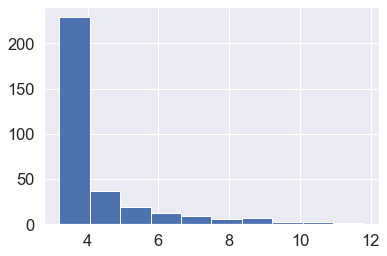

In [126]:
plt.hist(y_Sulfur)